In [39]:
import pickle
import numpy as np
from pathlib import Path
import glob
import pandas as pd
import matplotlib.pyplot as plt

# switch the path to represent the correct directory when switching devices and fetch the latest repo from github
# Marc_PC
data_folder = Path(r"C:\Users\marc_\OneDrive\Documents\Studie\Master\Master Internship 1 Neurophysics\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data")

# Amber_laptop
#data_folder = Path(r"C:\Users\renek\OneDrive\Documenten\Marc Studiemap\Master Internship 1\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data") 

In [40]:
# Path to where the data is on your machine.
data_path = data_folder.joinpath('20230211')

In [41]:
# Visualize files in session folder.
glob.glob(str(data_path)+'\\*')

['C:\\Users\\marc_\\OneDrive\\Documents\\Studie\\Master\\Master Internship 1 Neurophysics\\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\\data\\20230211\\behaviour_data.pickle',
 'C:\\Users\\marc_\\OneDrive\\Documents\\Studie\\Master\\Master Internship 1 Neurophysics\\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\\data\\20230211\\neural_data.pickle',
 'C:\\Users\\marc_\\OneDrive\\Documents\\Studie\\Master\\Master Internship 1 Neurophysics\\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\\data\\20230211\\parameters.yml',
 'C:\\Users\\marc_\\OneDrive\\Documents\\Studie\\Master\\Master Internship 1 Neurophysics\\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\\data\\20230211\\trial_data.csv']

In [42]:
trial_data_file = data_path.joinpath('trial_data.csv')
trial_data = pd.read_csv(trial_data_file)
trial_data

env_onset  tunnel1_onset  reward_zone_onset  tunnel2_onset  \
0         0.0          51742              62734          84207   
1     87311.0         117556             120011         154259   
2    158038.0         172831             213693         242507   
3    244749.0         266401             269199         339747   
4    342111.0         372283             382112         388546   
5    396273.0         413147             415210         436766   
6    437438.0         459485             462992         471835   
7    474908.0         526669             539910         611337   
8    614135.0         665133             667664         683879   
9    684559.0         696625             700692         720849   
10   724404.0         767816             770337         786315   
11   789181.0        1031303            1034565        1044068   
12  1045882.0        1076960            1080587        1087416   
13  1089710.0        1135645            1196135        1209629   
14  1213466.0        1250373            1254216        1274483   
15  1278629.0        1308941            1313870        1335645   
16  1339416.0        1429849            1433750        1459183   
17  1461888.0        1514918            1522447        1533877   
18  1537365.0        1579453            1602108        1608257   
19  1611000.0        1654674            1658100        1671391   
20  1673712.0        1684365            1703571        1712014   
21  1714256.0        1742237            1746888        1840438   
22  1842763.0        1870443            1873350        1895117   
23  1897685.0        1912943            1926334        1931596   
24  1933960.0        1966356            1969347        1990395   
25  1990913.0        1998836            2002727        2014743   
26  2017412.0        2036346            2038865        2043919   
27  2046167.0        2063024            2069607        2088567   
28  2091207.0        2113380            2130992        2136662   
29  2138865.0        2152327            2160624        2166972   
30  2169453.0        2303560            2305856        2310402   
31  2311855.0        2329164            2345725        2351346   
32  2354093.0        2364034            2366328        2373341   
33  2374640.0        2405693            2407994        2413289   
34  2415628.0        2450224            2478448        2483164   
35  2484166.0        2495775            2505383        2529033   
36  2531294.0        2567454            2605455        2612175   
37  2614514.0        2654638            2656818        2660643   
38  2662284.0        2686803            2689692        2695072   
39  2696666.0        2713141            2747012        2750857   

    tunnel2_offset  trial_duration  env_label  sound_onset  sound_offset  \
0            87311             NaN          1      48182.0      163347.0   
1           158038             NaN          3          NaN           NaN   
2           244749             NaN          1     166359.0      257770.0   
3           342111             NaN          2     260775.0      363012.0   
4           396273             NaN          1     366022.0      399709.0   
5           437438             NaN          2     402721.0      449813.0   
6           474908             NaN          1     452816.0      481899.0   
7           614135             NaN          3     484920.0      617838.0   
8           684559             NaN          3     620845.0      688756.0   
9           724404             NaN          2     691767.0      741830.0   
10          789181             NaN          1     744836.0     1126170.0   
11         1045882             NaN          2          NaN           NaN   
12         1089710             NaN          1          NaN           NaN   
13         1213466             NaN          3    1129182.0     1218107.0   
14         1278629             NaN          3    1221124.0     1283449.0   
15         1339416             NaN          2    1286469.0     1465814.0   
16   

In [43]:
# Load behavioural data.
bdata_file = data_path.joinpath('behaviour_data.pickle')
with open(bdata_file,'rb') as file:
    b_data = pickle.load(file)

In [44]:
position = b_data['position']
pos_list = []
for i in range(len(trial_data)):
    row = trial_data.iloc[i]
    onset = row['env_onset'].astype(int)
    offset = row['tunnel2_offset']

    pos_segment = position[onset:offset]
    print(f'{i}: {np.max(pos_segment)-np.min(pos_segment)}')
    # normalize
    pos_segment = (pos_segment - np.min(pos_segment))/(np.max(pos_segment)-np.min(pos_segment))
    pos_list.append(pos_segment)

    if i==0:
        norm_pos = pos_segment
    else:
        norm_pos = np.hstack([norm_pos,pos_segment])

0: 4455
1: 2501
2: 2100
3: 2299
4: 2204
5: 2100
6: 2398
7: 2401
8: 2208
9: 2395
10: 2493
11: 2205
12: 2451
13: 2343
14: 2554
15: 2503
16: 2555
17: 2393
18: 2503
19: 2604
20: 2451
21: 2444
22: 2498
23: 2609
24: 2259
25: 2583
26: 2802
27: 2449
28: 2505
29: 2492
30: 2407
31: 2244
32: 2255
33: 2503
34: 2206
35: 2535
36: 2404
37: 2353
38: 2250
39: 2295


In [45]:
# Insight into what the behavioural data contains.
for k in b_data.keys():
    print(f'{k} with shape: {b_data[k].shape}')

time with shape: (2813328,)
position with shape: (2813328,)
lick_onsets with shape: (3516,)
lick_offsets with shape: (3517,)
reward_onsets with shape: (40,)
reward_offsets with shape: (40,)


In [46]:
b_data['lick_offsets'][:-1]-b_data['lick_onsets']

array([ -30,  -25,  -47, ...,  -77,  -48, -655], dtype=int64)

In [47]:
time = b_data['time']
time

array([ -11.02960041,  -11.02860041,  -11.02760041, ..., 2802.41539959,
       2802.41639959, 2802.41739959])

# Neural data

In [48]:
# Neural data
ndata_file = data_path.joinpath('neural_data.pickle')
with open(ndata_file,'rb') as file:
    n_data = pickle.load(file)

In [49]:
for k in n_data.keys():
    if type(n_data[k])==np.ndarray:
        print(f'{k}-> array with shape: {n_data[k].shape}')
    else:
        print(f'{k}-> list with len {len(n_data[k])}')

traces-> array with shape: (355, 83737)
footprints-> array with shape: (490, 490, 355)
df_f-> array with shape: (355, 83737)
deconvolved-> list with len 355
positions-> array with shape: (355, 2)
contour-> list with len 355


In [50]:
spikes = n_data['deconvolved'] # number of neurons, list
spikes # moments in frames when neuron activity is recorded

[array([   31,    77,   109,   116,   141,   150,   204,   344,   372,
          409,   610,   654,   681,   787,   883,   885,   905,   957,
          958,   976,  1035,  1119,  1127,  1194,  1224,  1324,  1411,
         1461,  1465,  1469,  1522,  1523,  1541,  1551,  1616,  1628,
         1644,  1686,  1767,  1861,  1878,  1879,  1880,  1924,  2017,
         2018,  2035,  2087,  2116,  2227,  2242,  2250,  2276,  2277,
         2340,  2359,  2361,  2370,  2430,  2624,  2694,  2723,  2727,
         2736,  2743,  2814,  2815,  2872,  2917,  2953,  2964,  3146,
         3190,  3203,  3230,  3283,  3284,  3327,  3348,  3381,  3464,
         3625,  3651,  3659,  3664,  3672,  3745,  3797,  3844,  3896,
         3920,  3925,  3927,  3994,  4012,  4056,  4064,  4103,  4113,
         4123,  4134,  4190,  4200,  4221,  4232,  4234,  4287,  4366,
         4368,  4500,  4552,  4565,  4566,  4571,  4597,  4612,  4671,
         4681,  4782,  4785,  4789,  4794,  4796,  4800,  4835,  4840,
      

In [51]:
dt = 1/30. # scanner recording frequency
end_time = n_data['traces'].shape[1]
scanner_times = np.arange(0, end_time, dt)
scanner_times # time at which each frame of the video is acquired

array([0.00000000e+00, 3.33333333e-02, 6.66666667e-02, ...,
       8.37369000e+04, 8.37369333e+04, 8.37369667e+04])

In [52]:
spike_times = []
for s in spikes:
    spike_times.append(scanner_times[s])

spike_times

[array([1.03333333e+00, 2.56666667e+00, 3.63333333e+00, 3.86666667e+00,
        4.70000000e+00, 5.00000000e+00, 6.80000000e+00, 1.14666667e+01,
        1.24000000e+01, 1.36333333e+01, 2.03333333e+01, 2.18000000e+01,
        2.27000000e+01, 2.62333333e+01, 2.94333333e+01, 2.95000000e+01,
        3.01666667e+01, 3.19000000e+01, 3.19333333e+01, 3.25333333e+01,
        3.45000000e+01, 3.73000000e+01, 3.75666667e+01, 3.98000000e+01,
        4.08000000e+01, 4.41333333e+01, 4.70333333e+01, 4.87000000e+01,
        4.88333333e+01, 4.89666667e+01, 5.07333333e+01, 5.07666667e+01,
        5.13666667e+01, 5.17000000e+01, 5.38666667e+01, 5.42666667e+01,
        5.48000000e+01, 5.62000000e+01, 5.89000000e+01, 6.20333333e+01,
        6.26000000e+01, 6.26333333e+01, 6.26666667e+01, 6.41333333e+01,
        6.72333333e+01, 6.72666667e+01, 6.78333333e+01, 6.95666667e+01,
        7.05333333e+01, 7.42333333e+01, 7.47333333e+01, 7.50000000e+01,
        7.58666667e+01, 7.59000000e+01, 7.80000000e+01, 7.863333

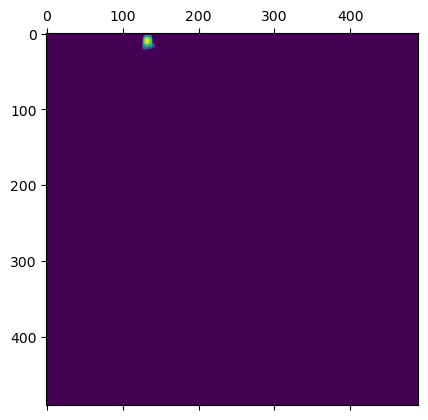

In [53]:
footprints = n_data['footprints'] # physical location of the neurons in the FOV of the recording camera in pixels
plt.matshow(footprints[:,:,100])

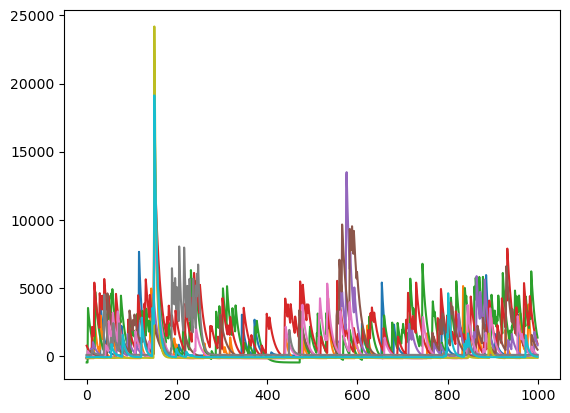

In [54]:
for i in range(10):
    plt.plot(n_data['traces'][i,:1000])

# Goal 6: compute place cells

**Raster plots**  

Raster plots are useful to visualize the spiking activity of neurons in a given time windows.
They visualize each spike as a dot or a small line, with a position along the x axis that corresponds to the emission time.  
The y axis usually displays different neurons,to give a glimpse of the overall population activity in the given time window, or different trials, to show how variable the response of the visualized neuron is from one trial to the other.
To build a raster plot we:
- isolate the spikes emitted during the periods of interests
- align the spikes to the onset (or some other time of interest) of the period of interest
- Plot each spike as a dot with x corresponding to its aligned emission time, and y corresponding to the neuron it was emitted by (or the repetition during which it was emitted).



**Peri-stimulus time histogram (PSTH)**

Peri-stimulus time histograms are used to visualize the timecourse of the activation of a neuron in response to a certain event, repeated a number $r$ of times.
To build the PSTH we:
- Build the rasterplot of the neuron
- Bin the interval in $N$ intervals of size $\Delta$
- Count the total number of spikes $n_{i}$ that fall into bin $i$
- Plot the count $n_{i}$ for each bin, or the firing rate $n_{i}/ r \Delta$

This yields an histogram of the number of spikes (or the firing rate) for each time bin of the period of interest.


**Tuning curves**

To investigate the modulation of the activity of a neuron as a fucntion of a continuous parameter $S$ (usually an external stimulus, or a behavioural correlate), we can look at the neuron's *tuning curve*.  
The tuning curve $ <r> = f(s)$ gives the expected firing rate of the neuron given that $S$ assumes the value $s$.
To build a tuning curve we:
- Bin the parameter $S$ in $N$ bins of size $\Delta s$
- Compute, for each bin, the average firing rate of the neuron during the periods in which S assumes values within the bin.
- Optionally, fit a functional form to the obtained histogram

This procedure yields an histogram, that gives us information about how the neuron responds to different values of the $S

In [55]:
import scipy
import scipy.stats
import scipy.io
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
from tqdm import tqdm
import seaborn as sns

In [56]:
track_length = 200. # the length of our linear track (eg in centimeter)
average_firing_rate = 5 # the peak firing rate, averaged across the population 
n_cells = 100 # how many cells we are recording
pf_centers = np.random.rand(n_cells) * track_length # the centers of the place fields for all cells drawn randomly with a uniform distribution on the track
pf_size = np.random.gamma(10, size=n_cells) # the size (width) of the place fields, drawn randomly from a gamma distribution 
pf_rate = np.random.exponential(scale=average_firing_rate, size=n_cells) # the peak firing rate for each cell,

Text(0, 0.5, 'Probability')

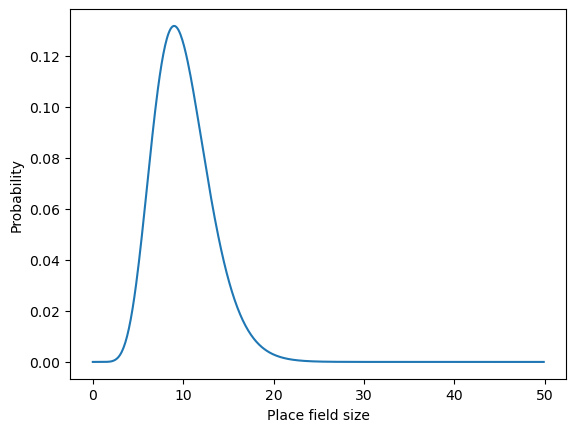

In [57]:
x = np.arange(0., 50., 0.1) # we use a grid with step 0.1
g = scipy.stats.gamma.pdf(x, 10)
plt.plot(x, g)
plt.xlabel('Place field size')
plt.ylabel('Probability')

In [58]:
len(spike_times) # in seconds

355

In [59]:
norm_pos.shape

(2752932,)

In [60]:
t = b_data['time'][:len(norm_pos)]
t.shape 

(2752932,)

In [61]:
spike_positions = [np.interp(s, t, norm_pos) for s in spike_times] 
spike_positions

[array([2.54979515e-01, 2.79012346e-01, 2.91582492e-01, 2.91582492e-01,
        2.91358025e-01, 2.91358025e-01, 2.91492796e-01, 2.91358025e-01,
        2.91358025e-01, 2.92929293e-01, 4.50953984e-01, 4.64197531e-01,
        4.89337823e-01, 5.10662177e-01, 5.10662177e-01, 5.10662177e-01,
        5.10662177e-01, 5.10662177e-01, 5.10662177e-01, 5.20763187e-01,
        5.73872145e-01, 6.87766554e-01, 6.96969697e-01, 7.70505142e-01,
        8.00448934e-01, 8.15263749e-01, 8.15263749e-01, 8.15263749e-01,
        8.15263749e-01, 8.15263749e-01, 8.25364759e-01, 8.26262626e-01,
        8.37485971e-01, 8.43546577e-01, 8.65544332e-01, 8.65993266e-01,
        8.66217733e-01, 8.66217733e-01, 8.65544332e-01, 8.65544332e-01,
        8.65544332e-01, 8.65544332e-01, 8.65544332e-01, 8.65544332e-01,
        8.65768799e-01, 8.65768799e-01, 8.65768799e-01, 8.65768799e-01,
        8.65768799e-01, 9.53086420e-01, 9.71268238e-01, 9.75757576e-01,
        9.87429854e-01, 9.88866351e-01, 4.42224737e-02, 7.077169

In [62]:
space_bins = np.arange(0., 1., 0.05) # range of position = norm_pos
vr_dt = 1/1000.
# we compute histograms for eaxh cell
spikes_hist= [np.histogram(s, space_bins)[0] for s in spike_positions]

# put them together into a matrix of floating point numbers (for plotting)
spikes_hist = np.vstack(spikes_hist).astype(np.float64)

# we also need an "occupancy histogram" in order to normalize the firing rates maps 
occupancy = np.histogram(norm_pos, space_bins)[0] * vr_dt # VR acquisition system

firing_rate_maps = spikes_hist / occupancy 

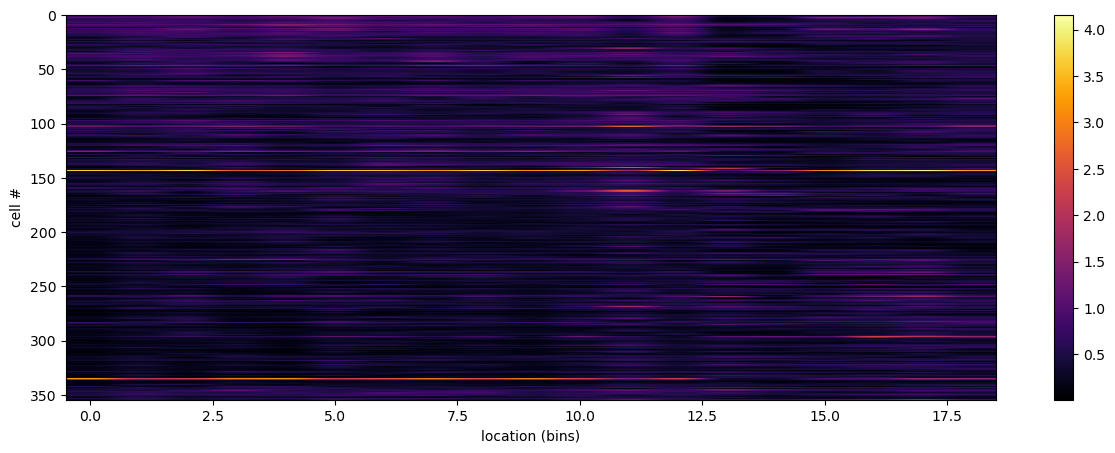

In [63]:
plt.figure(figsize=(15,5))
plt.imshow(firing_rate_maps, cmap='inferno', aspect = 'auto')
plt.xlabel('location (bins)')
plt.ylabel('cell #')
plt.colorbar()

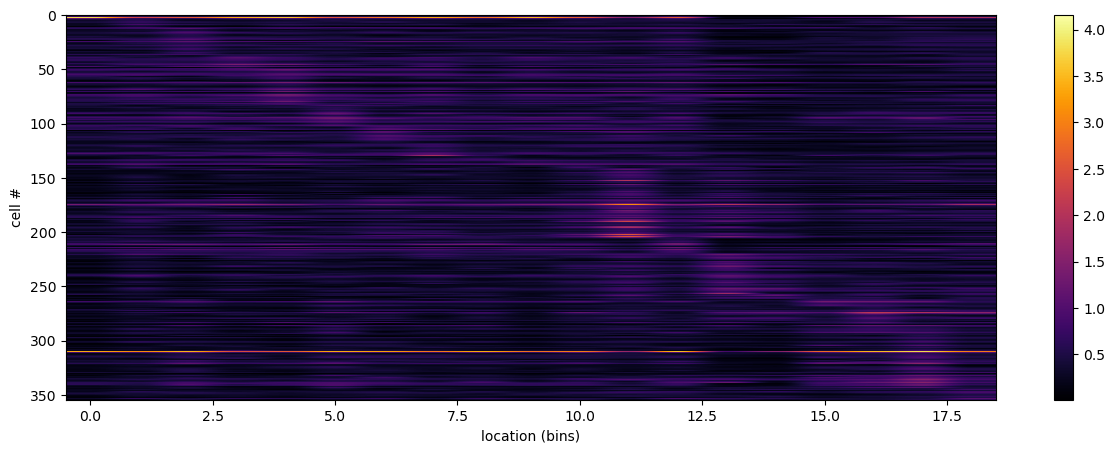

In [64]:
plt.figure(figsize=(15,5))
peak_locations = firing_rate_maps.argmax(axis=1)
ix = np.argsort(peak_locations)
plt.imshow(firing_rate_maps[ix,:], cmap='inferno', aspect = 'auto')
plt.xlabel('location (bins)')
plt.ylabel('cell #')
plt.colorbar()